## **PDS-2024/2025 Α1**


Here is the 1st assignment for the course of Practical Data Science 2024/2025 which comprises two sections.

### **Section A**

**1. Load the annotation files and compute the probability per emotion per annotator. Visualise it in a single plot.**

 The first step is to load all the annotation files and create a dataframe containing their contents. The dataframe will contain two index columns containing the text snippets and emotions and also one column per annotator containing their annotations

In [1]:
# Importing some required packages
import os
import pandas as pd
import re
from IPython.display import display

# Initializing an empty dataframe to store all the annotations
annotations = pd.DataFrame()

# Setting an idicator for the number of parsed valid files
number_of_files = 0

# Iterating through the files of the "annotations" folder
for file in os.listdir("annotations"):

    # Searching for a pattern in the name of the file
    pattern = re.search("^[fp]{1}[0-9]{7}.xlsx$", file)

    # Checking if the file is a valid annotation file
    if pattern is not None:

        # Updating the number of the parsed valid file
        number_of_files += 1

        # Reading the annotation file
        annotation = pd.read_excel(f"annotations/{pattern[0]}", skiprows=1)

        # Droping the "id" column
        annotation.drop(columns=["id"], inplace=True)

        annotation = annotation.melt(id_vars=['text'], var_name='emotion', value_name="value")

        # Checking if the parsed file is the first one and updating the "text" column of the annotations dataframe
        if number_of_files == 1:
            annotations[["text", "emotion"]] = annotation[["text", "emotion"]]

        # Getting the annotations per text
        annotations[pattern[0].split(".")[0]] = annotation["value"]

# Setting as index the "text" and "emotion" columns
annotations.set_index(["text", "emotion"], inplace=True)

# Filling up the NaN values with 0
annotations.fillna(0, inplace=True)

# Converting the type of columns to int
annotations = annotations.astype(int)

annotations.head(5)

,,f3352316,f3352401,f3352402,f3352403,f3352404,f3352405,f3352406,f3352407,f3352409,f3352410,p3210105,p3352313
text,emotion,,,,,,,,,,,,
"My mouth fell open `` No, no, no... I..",Anger,0,0,0,0,0,1,0,0,0,0,0,0
You can barely make out your daughter's pale form in the darkness of your room.,Anger,1,0,0,0,0,0,0,1,0,0,1,0
"But after blinking my eyes for a few times lepas tu tampar-tampar muka sikit, memang sah la yang penghantar itu Hanis Zalikha.",Anger,0,0,0,0,0,0,0,0,0,0,1,0
Slowly rising to my feet I came to the conclusion that sometimes being alone meant surviving for myself.,Anger,0,1,0,0,0,0,0,0,1,0,0,0
I noticed this months after moving in and doing all of my basic routines in my room naked.,Anger,0,0,0,0,1,0,0,0,0,0,1,0


To calculate the probability of each emotion, we need to find the total number of unique text snippets included in the annotated dataset and how many times each emotion receives annotation 1. This must be done for each annotator. To achieve this, we will follow the formula below to calculate the probabilities:


$$
P(Emotion) = \frac{\text{Number of times emotion is } 1}{\text{Total number of text snippets}}
$$

In [2]:
# Finding the total text snippets
total_texts = annotations.index.get_level_values("text").nunique()

# Calculating the probabilities per emotion and annotator
emotion_probabilities = annotations.apply(lambda column: column.groupby(level='emotion').agg(lambda x: (x.sum() / total_texts).round(2)), axis=0)

emotion_probabilities

,f3352316,f3352401,f3352402,f3352403,f3352404,f3352405,f3352406,f3352407,f3352409,f3352410,p3210105,p3352313
emotion,,,,,,,,,,,,
Anger,0.20,0.08,0.10,0.24,0.26,0.25,0.16,0.32,0.31,0.16,0.29,0.08
Fear,0.17,0.19,0.15,0.28,0.38,0.23,0.25,0.23,0.41,0.15,0.23,0.28
Joy,0.12,0.11,0.14,0.31,0.18,0.24,0.16,0.19,0.21,0.14,0.25,0.14
Sadness,0.22,0.21,0.54,0.41,0.26,0.34,0.29,0.44,0.63,0.16,0.55,0.22
Surprise,0.12,0.28,0.19,0.28,0.22,0.41,0.23,0.18,0.22,0.19,0.49,0.15


To visualize the probabilities, we will use a heatmap, which facilitates the identification of patterns and variations in the annotations by emotion

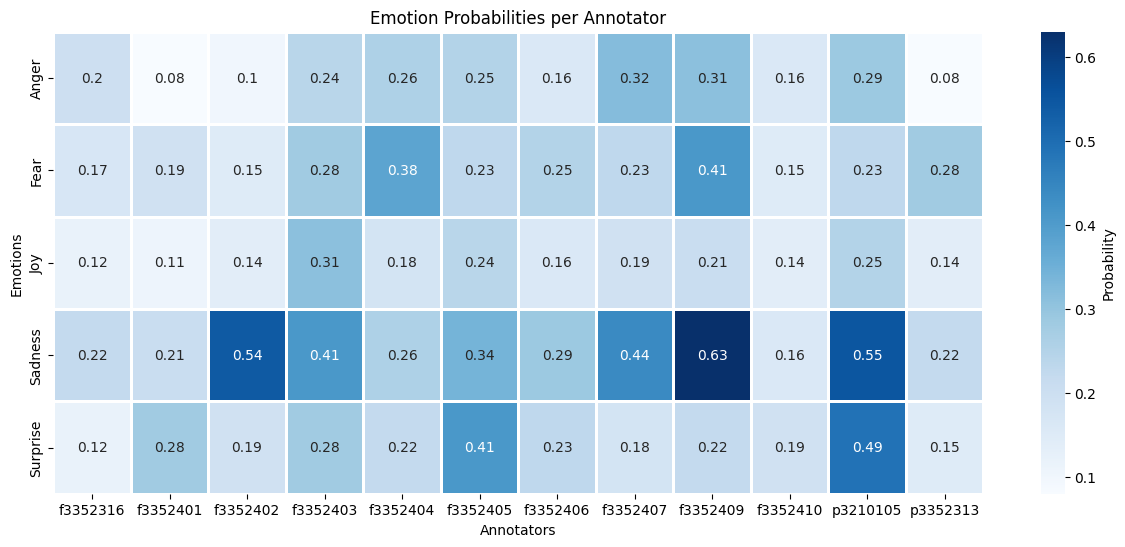

In [3]:
# importing some required packages
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(15, 6))

# Creating the heatmap showing the probabilities
sns.heatmap(emotion_probabilities, annot=True, cmap="Blues", cbar_kws={'label': 'Probability'}, linewidths=2)

# Adding title and labels
plt.title("Emotion Probabilities per Annotator")
plt.xlabel("Annotators")
plt.ylabel("Emotions")

# Showing the plot
plt.show()

**2. Compute the pairwise inter-annotator agreement, using both Cohen's kappa and percentage agreeemnt. Compare the two and discuss any differences. Visualise the best of the two using a table of agreement with a heatmap.**

Let's compute the two types of Inter-Annotator Agreement

In [4]:
# Importing some required packages
from sklearn.metrics import cohen_kappa_score as kappa
from IPython.display import display

# Setting up two dictionaries to store the percentage aggreement and the kappa metric for each pair of annotators
percentage_agreement, kappa_agreement = {a:{} for a in annotations.columns}, {a:{} for a in annotations.columns}

# Iterating through the columns of the 'annotations' dataframe
for column_1 in annotations.columns:
    
    # Iterating again through the columns of the 'annotations' dataframe to get the pairs
    for column_2 in annotations.columns:

        # Checking if the annotators are different or not and calculating the agreement metrics respectively
        if column_1 == column_2:
            percentage_agreement[column_1][column_2], kappa_agreement[column_1][column_2] = 1, 1
        else:
            percentage_agreement[column_1][column_2] = (annotations[[column_1, column_2]].apply(lambda row: 1 if row[column_1] == row[column_2] else 0, axis=1).sum() / (total_texts * 5)).round(2)
            kappa_agreement[column_1][column_2] = annotations[[column_1, column_2]].groupby(level="emotion").apply(lambda group: kappa(group[column_1], group[column_2])).mean().round(2)

# Transforming the dictionaries to dataframes
percentage_agreement_df = pd.DataFrame.from_dict(percentage_agreement)
kappa_agreement_df = pd.DataFrame.from_dict(kappa_agreement)

# Printing the inter-annotator agreement based on both measures 
print("The Inter-Annonator Agreement for all the pairs of annotators based on the percentage of agreement:")
display(percentage_agreement_df)
print("The Inter-Annonator Agreement for all the pairs of annotators based on the Cohen's kappa metric:")
display(kappa_agreement_df)

The Inter-Annonator Agreement for all the pairs of annotators based on the percentage of agreement:


,f3352316,f3352401,f3352402,f3352403,f3352404,f3352405,f3352406,f3352407,f3352409,f3352410,p3210105,p3352313
f3352316,1.00,0.85,0.76,0.78,0.78,0.75,0.82,0.77,0.70,0.86,0.69,0.85
f3352401,0.85,1.00,0.77,0.76,0.80,0.74,0.81,0.74,0.72,0.84,0.69,0.85
f3352402,0.76,0.77,1.00,0.74,0.73,0.66,0.76,0.75,0.72,0.77,0.68,0.78
f3352403,0.78,0.76,0.74,1.00,0.75,0.68,0.75,0.76,0.74,0.78,0.72,0.77
f3352404,0.78,0.80,0.73,0.75,1.00,0.70,0.77,0.75,0.71,0.79,0.68,0.82
f3352405,0.75,0.74,0.66,0.68,0.70,1.00,0.72,0.69,0.63,0.73,0.68,0.71
f3352406,0.82,0.81,0.76,0.75,0.77,0.72,1.00,0.74,0.69,0.81,0.70,0.81
f3352407,0.77,0.74,0.75,0.76,0.75,0.69,0.74,1.00,0.72,0.77,0.71,0.77
f3352409,0.70,0.72,0.72,0.74,0.71,0.63,0.69,0.72,1.00,0.71,0.68,0.71
f3352410,0.86,0.84,0.77,0.78,0.79,0.73,0.81,0.77,0.71,1.00,0.70,0.83


The Inter-Annonator Agreement for all the pairs of annotators based on the Cohen's kappa metric:


,f3352316,f3352401,f3352402,f3352403,f3352404,f3352405,f3352406,f3352407,f3352409,f3352410,p3210105,p3352313
f3352316,1.00,0.49,0.24,0.40,0.37,0.30,0.44,0.34,0.26,0.49,0.25,0.46
f3352401,0.49,1.00,0.28,0.34,0.42,0.26,0.41,0.27,0.33,0.44,0.22,0.47
f3352402,0.24,0.28,1.00,0.30,0.30,0.09,0.29,0.27,0.26,0.25,0.18,0.29
f3352403,0.40,0.34,0.30,1.00,0.39,0.24,0.35,0.41,0.39,0.40,0.35,0.38
f3352404,0.37,0.42,0.30,0.39,1.00,0.26,0.37,0.35,0.32,0.39,0.27,0.45
f3352405,0.30,0.26,0.09,0.24,0.26,1.00,0.27,0.25,0.16,0.26,0.26,0.21
f3352406,0.44,0.41,0.29,0.35,0.37,0.27,1.00,0.30,0.26,0.41,0.27,0.39
f3352407,0.34,0.27,0.27,0.41,0.35,0.25,0.30,1.00,0.31,0.33,0.32,0.34
f3352409,0.26,0.33,0.26,0.39,0.32,0.16,0.26,0.31,1.00,0.28,0.29,0.28
f3352410,0.49,0.44,0.25,0.40,0.39,0.26,0.41,0.33,0.28,1.00,0.27,0.39


The Inter-Annotator Agreement based on the percentage of agreement is a good metric and shows valuable information about how much the annotators agree, but it does not take into account the possibility the annotators agree randomly, which is satisfied by using the Cohen's kappa metric. As we can see above in all cases the Inter-Annotator Agreement gets lower values in the Cohen's kappa metric which is perfectly reasonable because it includes the probability of random agreement that reduces the agreement between annotators. In general, the Cohen's kappa metric gives a more accurate and clear view about how much the annotators agree.

Let's visualize the Inter-Annotator Agreement based on the the Cohen's kappa metric

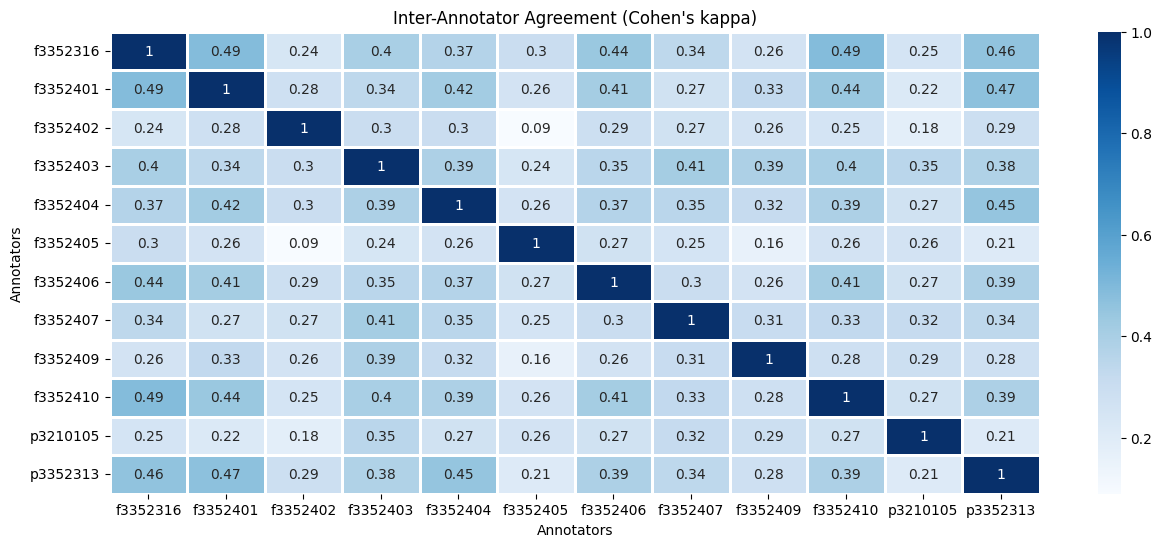

In [5]:
# Setting up the figure
plt.figure(figsize=(15, 6))

# Creating the heatmap showing the inter-annotator agreement for all the pairs of annotators based on the Cohen's kappa measure
sns.heatmap(kappa_agreement_df, annot=True, cmap="Blues", linewidths=2)

# Adding title and labels
plt.title("Inter-Annotator Agreement (Cohen's kappa)")
plt.xlabel("Annotators")
plt.ylabel("Annotators")

# Showing the plot
plt.show()

**3. Compute a ground truth value per emotion per text (e.g., using a majority vote).**

In order to compute the ground truth value per emotion per text, i will find the average annotation per text per emotion and round it to the nearest integer

In [6]:
# Taking the average annotation per text and emotion
average_per_text_emotion = annotations.mean(1)

# Creating a new dataframe with the ground truth per text and emotion
ground_truth_df = pd.DataFrame({"average": average_per_text_emotion, "ground_truth":average_per_text_emotion.apply(lambda row: round(row))})

ground_truth_df.head(5)

,,average,ground_truth
text,emotion,,
"My mouth fell open `` No, no, no... I..",Anger,0.083333,0
You can barely make out your daughter's pale form in the darkness of your room.,Anger,0.250000,0
"But after blinking my eyes for a few times lepas tu tampar-tampar muka sikit, memang sah la yang penghantar itu Hanis Zalikha.",Anger,0.083333,0
Slowly rising to my feet I came to the conclusion that sometimes being alone meant surviving for myself.,Anger,0.166667,0
I noticed this months after moving in and doing all of my basic routines in my room naked.,Anger,0.166667,0


Thus, the final dataset containing the ground truth values will be as follows

In [7]:
# Constructing the final dataset with the ground truth values per text and emotion
final_dataset = ground_truth_df['ground_truth'].unstack()

final_dataset.head(5)

emotion,Anger,Fear,Joy,Sadness,Surprise
text,,,,,
""" And burst into tears.",0,0,0,1,0
""" I'm like ""sure.",0,0,0,0,0
"""ARcH stop your progression.",1,0,0,0,0
"""I don't have time to arrest drunk drivers because of all the murders, rapes, and robberies we have to deal with.",1,0,0,1,0
& # x 26; nbsp; What I did was cut the top off of a plastic gallon milk carton leaving the handle then by standing next to body of water or sometimes partially in it I could get a good dowseing dipping the carton into the water and then dumping it over my head.,0,0,0,0,0


**4. Prompt an open-source large language model (LLM), such as the Llama-3-8b-instruct (quantized) that we used in class to annotate each text for existing emotions.**

Let's prompt the llama llm to annotate on the texts without socio-demographic background

In [8]:
# importing some packages
import ollama
import ast


def llama_annotate(text, background):
    """ 
    This function is used to prompt llama llm to annotate a given text and take into account a given background.

    :param text: A text to annotate
    :param background: The background to use in order to annotate
    :return: The annotation
    """    

    # Prompting
    response = ollama.chat(
        model="llama3.2",
        messages=[
            {
                "role": "system",
                "content":
                f"""
                You are an annotation system that identifies and annotates on what emotions are associated with a text. The possible emotions are:\n\
                    1. 'Anger'\n\
                    2. 'Fear'\n\
                    3. 'Joy'\n\
                    4. 'Sadness'\n\
                    5. 'Surprise'\n\
                    \n\
                Important Instructions:\n\
                    - {background}\n\
                    - If an emotion is expressed by the text then you mark this emotion with 1 otherwise with 0.\n\
                    - A text can be associated with more than one emotion.\n\
                    - If none of the emotions are expressed by the text, then all of their labels are 0.\n\
                    - Give an annotation for every emotion. Do not give NaN values.\n\
                    - Return only a dictionary where its keys are the emotions and the values of them are the corresponding labels (e.g. {{"Anger": 1, "Fear":0, "Joy":0, "Sadness":1, "Surprise":0}}). Do not include any extra text or explanations.
                """
            },
            {
                "role": "user",
                "content":f"Given the text: {text}, what are the emotions related to it?",
            }
        ],
    )

    return ast.literal_eval(response["message"]["content"])


# Creating a dataframe to store the llama annotations
llama_annotations = pd.DataFrame({"text": annotations.index.get_level_values("text").unique()})

# Prompting for each text
llama_annotations["emotions"] = llama_annotations["text"].apply(lambda row: llama_annotate(row, "Your annotations are neutral with no socio-demographic background."))

# Expand the 'emotions' dictionary column into separate columns
emotions_df = llama_annotations["emotions"].apply(pd.Series)

# Concatenate the new columns with the original DataFrame
llama_annotations = pd.concat([llama_annotations.drop(columns=['emotions']), emotions_df], axis=1)

llama_annotations.head(5)

,text,Anger,Fear,Joy,Sadness,Surprise
0,"My mouth fell open `` No, no, no... I..",0,0,0,0,1
1,You can barely make out your daughter's pale f...,0,1,0,1,0
2,But after blinking my eyes for a few times lep...,0,0,0,0,1
3,Slowly rising to my feet I came to the conclus...,0,0,0,0,0
4,I noticed this months after moving in and doin...,0,0,0,1,0


Let's compute the probability for each emotion based on the llama annotations

In [9]:
# Getting the total text snippets
total_text_snippets = len(llama_annotations)

# Getting the amount of times each emotion annotated with 1
frequency = llama_annotations.loc[:, llama_annotations.columns != "text"].sum()

# Calculating the probability for each emotion
probability = (frequency / total_text_snippets).round(2).sort_values(ascending=False)

# Printing the probabilities
print(f"Below is the pprobability for each emotion based on llama:\n{probability}")

Below is the pprobability for each emotion based on llama:
Surprise    0.24
Fear        0.21
Sadness     0.20
Anger       0.18
Joy         0.09
dtype: float64


Let's visualize them

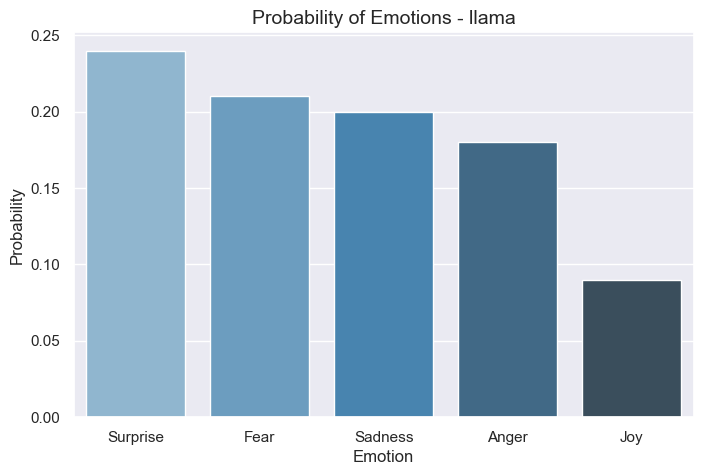

In [10]:
# importing required modules
import matplotlib.pyplot as plt
import seaborn as sns

# Converting the indices and the values of the Series object 'probability' to lists
emotions = probability.index.to_list()
probabilities = probability.tolist()

# Setting a plot style
sns.set_theme()

# Creating a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=emotions, y=probabilities, palette='Blues_d', hue=emotions)

# Setting the title of the plot and the labels of the axes
plt.title('Probability of Emotions - llama', fontsize=14)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Displaying the plot
plt.show()

**5. Instructing the LLM to have a different sociodemographic background before annotating. For instance, using gender, instruct the LLM to be a man and then to be a woman. Compare the two sets of annotations and quantify how much does the background affects the model's decisions. Compute the IAA between the agents and the human annotators. Discuss the outcomes.**

Let's give the first prompt for the background as "A 30-40 year old man with a low income"

In [13]:
# Creating a dataframe to store the llama annotations
llama_annotations_man_background = pd.DataFrame(
    {"text": annotations.index.get_level_values("text").unique()}
)

# Prompting for each text
llama_annotations_man_background["emotions"] = llama_annotations["text"].apply(
    lambda row: llama_annotate(row, "Your annotations should take into account that your background is a 30-40 year old man with a low income.")
)

# Getting the final annotation dataset
llama_annotations_man_background = pd.concat(
    [
        llama_annotations_man_background.drop(columns=["emotions"]),
        llama_annotations_man_background["emotions"].apply(pd.Series),
    ],
    axis=1,
)

llama_annotations_man_background.head(5)

,text,Anger,Fear,Joy,Sadness,Surprise
0,"My mouth fell open `` No, no, no... I..",0,0,0,1,0
1,You can barely make out your daughter's pale f...,0,1,0,1,0
2,But after blinking my eyes for a few times lep...,0,0,0,0,1
3,Slowly rising to my feet I came to the conclus...,0,0,0,0,0
4,I noticed this months after moving in and doin...,0,0,0,1,1


Let's give the first prompt for the background as "A 30-40 year old woman with a very high income"

In [19]:
# Creating a dataframe to store the llama annotations
llama_annotations_woman_background = pd.DataFrame(
    {"text": annotations.index.get_level_values("text").unique()}
)

# Prompting for each text
llama_annotations_woman_background["emotions"] = llama_annotations["text"].apply(
    lambda row: llama_annotate(row, "Your annotations should take into account that your background is a 30-40 year old woman with a very high income.")
)

# Getting the final annotation dataset
llama_annotations_woman_background = pd.concat(
    [
        llama_annotations_woman_background.drop(columns=["emotions"]),
        llama_annotations_woman_background["emotions"].apply(pd.Series),
    ],
    axis=1,
)

llama_annotations_woman_background.head(5)

,text,Anger,Fear,Joy,Sadness,Surprise
0,"My mouth fell open `` No, no, no... I..",0,0,0,0,1
1,You can barely make out your daughter's pale form in the darkness of your room.,0,1,0,1,0
2,"But after blinking my eyes for a few times lepas tu tampar-tampar muka sikit, memang sah la yang penghantar itu Hanis Zalikha.",0,0,0,0,1
3,Slowly rising to my feet I came to the conclusion that sometimes being alone meant surviving for myself.,0,0,0,0,0
4,I noticed this months after moving in and doing all of my basic routines in my room naked.,0,0,0,1,0


To compare the annotations, we will find the Inter-Annotator Agreement based on the the Cohen's kappa metric

In [21]:
# Creating a new dataframe containing both annoatations
llama_annotations_gender = llama_annotations_man_background.melt(id_vars=['text'], var_name='emotion', value_name="gender_man")
llama_annotations_gender["gender_woman"] = llama_annotations_woman_background.melt(id_vars=['text'], var_name='emotion', value_name="gender_woman")["gender_woman"]

llama_annotations_gender.head(5)

,text,emotion,gender_man,gender_woman
0,"My mouth fell open `` No, no, no... I..",Anger,0,0
1,You can barely make out your daughter's pale form in the darkness of your room.,Anger,0,0
2,"But after blinking my eyes for a few times lepas tu tampar-tampar muka sikit, memang sah la yang penghantar itu Hanis Zalikha.",Anger,0,0
3,Slowly rising to my feet I came to the conclusion that sometimes being alone meant surviving for myself.,Anger,0,0
4,I noticed this months after moving in and doing all of my basic routines in my room naked.,Anger,0,0


In [ ]:
# Calculating the Inter-Annotator Agreement
inter_aggreement = llama_annotations_gender.groupby("emotion").apply(lambda group: kappa(group["gender_man"], group["gender_woman"])).mean().round(2)

print(f"The Inter-Annotator Agreement between the llama agents is:\n{inter_aggreement}")

The Inter-Annotator Agreement between the llama agents is:
0.81


As we can see above the Inter-Annotator Agreement is quite high and close to the unit. This shows that the two llama agents almost agree on their annotations which shows that the backgrounds given do not play a very big role in the decisions.

Let's now compute the Inter-Annotator Agreement between the llama agents and the human annotators

In [42]:
# Appending the llama annotations to the human annotations dataframe
annotations[["gender_man", "gender_woman"]] = llama_annotations_gender[
    ["gender_man", "gender_woman"]
].values

# Setting up a dictionary to store the inter-annotator agreement based on the kappa metric for each pair (llama agent, human annotator)
kappa_agreement_agents_human_annotators = {"gender_man": {}, "gender_woman": {}}

# Iterating through the columns of the 'annotations' dataframe
for column_1 in annotations.columns:

    # Checking if the column is any llama agent and calculating the aggrement respectively
    if column_1 == "gender_man":
    
        kappa_agreement_agents_human_annotators[column_1][column_1] = 1
        kappa_agreement_agents_human_annotators["gender_man"]["gender_woman"] = (
            annotations[["gender_man", "gender_woman"]]
            .groupby(level="emotion")
            .apply(lambda group: kappa(group["gender_man"], group["gender_woman"]))
            .mean()
            .round(2)
        )

    elif column_1 == "gender_woman":

        kappa_agreement_agents_human_annotators[column_1][column_1] = 1
        kappa_agreement_agents_human_annotators["gender_woman"]["gender_man"] = (
            annotations[["gender_woman", "gender_man"]]
            .groupby(level="emotion")
            .apply(lambda group: kappa(group["gender_woman"], group["gender_man"]))
            .mean()
            .round(2)
        )

    else:

        kappa_agreement_agents_human_annotators["gender_man"][column_1] = (
            annotations[["gender_man", column_1]]
            .groupby(level="emotion")
            .apply(lambda group: kappa(group["gender_man"], group[column_1]))
            .mean()
            .round(2)
        )

        kappa_agreement_agents_human_annotators["gender_woman"][column_1] = (
            annotations[["gender_woman", column_1]]
            .groupby(level="emotion")
            .apply(lambda group: kappa(group["gender_woman"], group[column_1]))
            .mean()
            .round(2)
        )

# Converting the dictionary to dataframe
kappa_agreement_agents_human_annotators_df = pd.DataFrame.from_dict(kappa_agreement_agents_human_annotators)

In [43]:
kappa_agreement_agents_human_annotators_df

,gender_man,gender_woman
f3352316,0.39,0.42
f3352401,0.39,0.40
f3352402,0.27,0.24
f3352403,0.31,0.31
f3352404,0.38,0.37
f3352405,0.30,0.30
f3352406,0.33,0.32
f3352407,0.25,0.29
f3352409,0.23,0.23
f3352410,0.34,0.32


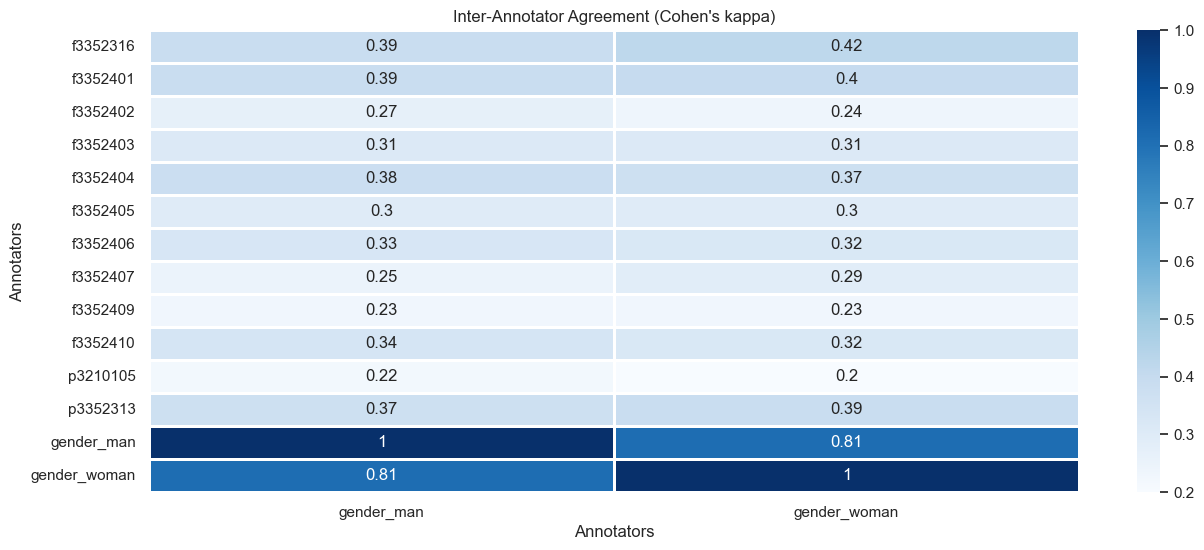

In [44]:
# Setting up the figure
plt.figure(figsize=(15, 6))

# Creating the heatmap showing the inter-annotator agreement for all the pairs (llama agent, human annotator) based on the Cohen's kappa measure
sns.heatmap(kappa_agreement_agents_human_annotators_df, annot=True, cmap="Blues", linewidths=2)

# Adding title and labels
plt.title("Inter-Annotator Agreement (Cohen's kappa)")
plt.xlabel("Annotators")
plt.ylabel("Annotators")

# Showing the plot
plt.show()

As we can see the Inter-Annotator Agreement values are relatively low which means the llama agents do not agree too much with the human annotators.

### **Section Β**

**1. Load the English proverbs, which have been translated by Llama-3-8b-instruct. Report any redundant text you find in these.**

Let's first load the data in a dataframe

In [140]:
# Importing some required packages
import pandas as pd
import re

# Setting display options 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Reading the data
proverbs_df = pd.read_csv("https://raw.githubusercontent.com/greek-proverb-atlas/proverbs.gr/refs/heads/main/data/balanced_corpus_en.csv")

proverbs_df.sample(5)

,Unnamed: 0,text,place,uri,collector,area,lat,lon,llama-8b
5050,41510,"Ακριβός κελλάρης, πάντα καλός κελλάρης",Ιωάννινα,http://hdl.handle.net/20.500.11853/148020,"Κατζιούλης, Παρθένιος",Ιωάννινα,39.663982,20.852278,"A precise tailor, always a good tailor. (The more precise and accurate you"
7799,62669,"Απ' όπου πηδήξ' η κατσίκα, θα πηδήξη και το κατσικάδι","Λέσβος, Μυτιλήνη",http://hdl.handle.net/20.500.11853/200259,"Λιουδάκη, Μαρία",Λέσβος,39.175842,25.998913,"From where the goat jumps, the goat kid will also jump. (meaning:"
1325,20824,Αφέντης μου κι' αφέντης του άκρια γενιά,Αμοργός,http://hdl.handle.net/20.500.11853/177472,"Ιωαννίδης, Εμμανουήλ",Αμοργός,36.852524,25.898487,My father and the father of my grandfather. (meaning a long time ago)
3000,35840,"Τι έχεις γέρο και χορεύεις, δε μ' αφινούν οι δαιμόνοι",Επτάνησος,http://hdl.handle.net/20.500.11853/174085,"Καββαδίας, Γεώργιος",Επτάνησος,38.835110,20.709439,"What you have as an old man, you dance with, the demons don't"
8410,88917,Το καλύτερο σου φαγεί (προσφάγη) είναι η πείνα,Λακωνία,http://hdl.handle.net/20.500.11853/261165,"Νεστορίδης, Κ.",Λακωνία,36.760279,22.790464,The best food for you is hunger<|eot_id|>


Give a more appropriate name to columns "text" and "llama-8b" and remove the first column as it does not provide additional information

In [141]:
# Renaming
proverbs_df.rename(columns={"text": "greek_proverb", "llama-8b": "english_proverb"}, inplace=True)

# Dropping
proverbs_df.drop(columns=["Unnamed: 0"], inplace=True)

proverbs_df.sample(5)

,greek_proverb,place,uri,collector,area,lat,lon,english_proverb
7666,Οπ' έχ' μυίγια μυιάζιτι,Λέσβος,http://hdl.handle.net/20.500.11853/284138,"Αναγνώστου, Σ.",Λέσβος,39.175842,25.998913,"Where there are flies, there are flies that bite. (There are always people"
8574,Τ' ακριβού το βιός στου χαραμπολή τα χέρια,Μακεδονία,http://hdl.handle.net/20.500.11853/158808,"Τσικόπουλος, Ι.",Μακεδονία,40.686024,23.693434,The exact proof is in the hands of the charmer. (It is in
2164,Η οχιά δεν μαγεύεται,"Αρκαδία, Γορτυνία",http://hdl.handle.net/20.500.11853/290749,"Κανδηλώρος, Τάκης Χ.",Αρκαδία,38.036858,23.668926,The snake cannot be enchanted. (A snake is not easily caught) or (
7618,Τουν πήρι γιάνεμους,Λέσβος,http://hdl.handle.net/20.500.11853/140833,"Αναγνώστου, Σ.",Λέσβος,39.175842,25.998913,A stone is not lost in the sea. (The sea is so vast that
4261,Γλήγορο (το) και το καλό δεν πάν μαζί τα δυο,"Θεσπρωτία, Παραμυθιά",http://hdl.handle.net/20.500.11853/162901,"Μουσελίμης, Σπ.",Θεσπρωτία,39.544012,20.308355,The good and the speedy do not go together. (The good and the


As redundant text in our task, we can define any text that does not give additional information for the Greek proverbs and their translation. Thus, we need to examine both the 'greek_proverb' and 'english_proverb' columns to see if there are redundant terms there.

After looking them up, the redundant terms are the following for both languages.

- **New Line Escape Sequence**

This only appears in the english translations and it is not needed for the analysis of the proverbs.

In [142]:
# Showing that in Greek versions there are not new line espace characters
proverbs_df[proverbs_df["greek_proverb"].str.contains(r"[\n]", regex = True)]["greek_proverb"]

Series([], Name: greek_proverb, dtype: object)

In [143]:
# Showing some examples from the english translations containing this character
proverbs_df[proverbs_df["english_proverb"].str.contains(r"[\n]", regex = True)]["english_proverb"].sample(5)

4656     They are eaten like ancestors. \n\nTranslation of the proverb: "When you're
2480             Twelve apostles, each one was crying his own pain. \n\n(Translation
7283    The blind man learns to see by touching his fingers. \n\n(Translation of the
2227                                The words pass over<|eot_id|> \n\nThe proverb "Π
7584               Believe in the cabbage and its tail. \nBelieve in the cabbage and
Name: english_proverb, dtype: object

- **Parentheses**

The parentheses in the original Greek proverbs are used to indicate variations of letters or words that could be used in them, but they are not useful for their analysis, as we only need one version to draw conclusions. Pairs of them or only one of them can be found.

In [144]:
# Showing cases where we have paranetheses in Greek proverbs
proverbs_df[proverbs_df["greek_proverb"].str.contains(r"[()]+", regex = True)]["greek_proverb"].sample(5)

6630     Βούϊ σελάτ' αγόραζε, καί γάϊδαρο καμπούρη, γυναίκα λιανοκάμωτη (ή λιχνοκάμωτη) καί χοίρο μακρομούρη
10204                                       Όλοι τη μάννα μου ρωτουν, το κόρη μου κανείς 'κε (δεν) ρωτάν τον
5737                                                           Γά(δ)αρος είν' ο γάαρος, α βάλη και τη σέλλαν
10789                                                   Το(ν) Μα κατέβα στο γιαλό, να φας του σκάρου το αυγό
7601                                                 Φάγι συ του κουλιό, κι' του νιρό του βρίστ'ς (βρίσκεις)
Name: greek_proverb, dtype: object

In the English version of the proverbs, parentheses are used to translate the content of the corresponding parentheses in the Greek version and also to add alternative translations or to explain the meaning of the proverbs. All these are redundant terms and should be removed and only one translation version should be retained. Pairs of them or just one of them can be found.

In [145]:
# Showing cases where we have paranetheses in English translations
proverbs_df[proverbs_df["english_proverb"].str.contains(r"[()]+", regex = True)]["english_proverb"].sample(5)

3063                      I know how to make a cat laugh. (Lit. I know how to
7352     With a foolish message, I become a fool. (A foolish message brings a
1870           A single thread is missing from the lace. (Proverb) Meaning: A
10273     The cloud is your father. (The cloud will provide you with shade.)<
5261        Empty sack, standing upright does not stay. (Translation)  or  An
Name: english_proverb, dtype: object

- **Special Characters '<' '>'**

These characters do not exist in the Greek version of the proverbs and appear only in the English translations. Pairs of them or just one of them can be found. They do not contain useful information about the translations.

In [146]:
# Showing that in the Greek version there are not this kind of characters
proverbs_df[proverbs_df["greek_proverb"].str.contains(r"[<>]+", regex = True)]["greek_proverb"]

Series([], Name: greek_proverb, dtype: object)

In [147]:
# Showing examples in English translations inluding this kind of operators
proverbs_df[proverbs_df["english_proverb"].str.contains(r"[<>]+", regex = True)]["english_proverb"].sample(5)

5514                                 Whatever the world says, even Cosmas<|eot_id|>
5694                He sits on the unseated. (English translation of the proverb) <
3305    An empty monk escapes his own bones and hides them. (English translation) <
545                                                   Takes a cold cookie<|eot_id|>
760                                      We have polished the rough stone<|eot_id|>
Name: english_proverb, dtype: object

- **The special character '|'**

After examining the data, I noticed that the character '|' does not exist in the Greek version of the proverbs, but only in the English version. In most cases, it is used as the word "or" to add an alternative translation of the proverb or something like that "The translation is". In all cases, the text after the character '|' is useless, except in one case where the main translation comes before it.

In [148]:
# Showing that in Greek proverbs this special character does not exist
proverbs_df[proverbs_df["greek_proverb"].str.contains(r"[|]+", regex = True)]["greek_proverb"]

Series([], Name: greek_proverb, dtype: object)

In [149]:
# Showing some examples of that character in English versions (excluding the cases with the characters '<' and'>')
proverbs_df[proverbs_df["english_proverb"].str.contains(r"[^!<>]+[|]+[^<>]+", regex = True)]["english_proverb"].sample(5)

10924               Our short dog is always a puppy. | Our small dog is always a puppy
5549                      If bees made honey, the world would be full of it. | If bees
6420               Ask where you're going and take care where you sit. |Ask about your
2768     The big ship needs deep waters. | A big ship requires deep waters to navigate
9766                                   You are right, but where is the proof?;|eot_id|
Name: english_proverb, dtype: object

The only case where the main translation is before the '|'

In [150]:
# Showing this case
proverbs_df.loc[2045, "english_proverb"]

'is the best response.  | The silence of mine to your answer is the'

- **The word 'or'**

There are cases where in the English translations there is the word 'or' in order to add an alternative translation of the proverb. It is not always easy to find the cases where 'or' used like that.

When there is the character '!' first and then the sentence contains 'or', we have an additional translation and it must be removed (redundant term).

In [151]:
# Showing this case
proverbs_df[proverbs_df["english_proverb"].str.contains(r"!.* or ", regex=True)][["greek_proverb", "english_proverb"]]

,greek_proverb,english_proverb
565,Είναι άλλη γούλη αυτός!,He has another tongue! or He has another mouth! or He is speaking with
857,Κάτ' τρέχ' στα γύφτικα!,Don't go to the underworld! or Don't go to the gypsy's
1085,Κρατάει την όροξή σου!,Keep your temper! (Literally: Keep your bile!) or Keep your cool
1294,Ω κεφαλή με τα δόντια!,A head with teeth! (meaning a clever or intelligent person) <|e
1372,"Φτάνει! Μα καλού κακού, βάλε δυο!","It's enough! But good or bad, add two! (or more)"
2088,Του ήρθαν τα μπουριά του!,They came with their own troubles! (idiomatic expression) or They came with
2508,Είναι παλιοσουγιάς!,It's old-fashioned! or It's old news! or It's old hat
2605,Κούτσουρα λιθάρια!,"Small stones, big problems! or Small stones make big problems. or Small stones"
2708,Παντρεύει Δεσπότη!,He marries a master! (or a noble) or Marrying a master
2728,Η δουλειά εσκόνταψε!,The work slipped away! or Work slipped away! or Work slipped through our fingers


When there is the character '?' first and then the sentence contains 'or', we have an additional translation and it must be removed (redundant term).

In [152]:
# Showing this case
proverbs_df[proverbs_df["english_proverb"].str.contains(r"[?].* or ", regex=True)][["greek_proverb", "english_proverb"]]

,greek_proverb,english_proverb
1949,Που να σε πάρ' η οργή,Where will your anger take you? or Where will your rage lead you? or
3893,"Τι έπαθε; Έκλεισ' η μέρα, ή ο καιρός; Μπήκε η μέρα στο σακκί;",What happened? Is the day locked or the weather? The day entered the sack
4596,Ποιός τον πιάνει τώρα,Who can catch him now? (It means that once someone has escaped or avoided


When there is the character '.' first and then the sentence contains 'or', we have an additional translation and it must be removed (redundant term).

In [153]:
# Showing this case
print(proverbs_df[proverbs_df["english_proverb"].str.contains(r"[.].* or ", regex=True)][["english_proverb"]])

                                                                               english_proverb
59                               Laughing to death. (It means to die laughing) or To laugh one
87                  Foreign things are the ones that spoil our own.  or Foreign things are the
135                   No good is good enough. or Nothing is perfect. or Nothing is good enough
295                          A child is still a child even if it is disciplined. or Even if it
354                       The ship doubled back. or The ship turned back. or The ship doubled.
402                            The idle man loses both time and clothes. (Proverb) or The idle
462                           A happy heart is good luck. or A happy heart is good fortune. or
469                            On this side sleep. (The other side is better) or Sleep on this
507                                I have seen nothing, do not see evil. (Greek) or Nothing is
512                         The whole is greater t

Cases where "ή" is present in the Greek version and the word "or" is also present in the main translation. Here we cannot exclude the text after it because it is part of the main translation. 

In [154]:
# Showing this case
proverbs_df[
    proverbs_df["greek_proverb"].str.contains(r" ή ", regex=False, case=False)
    & proverbs_df["english_proverb"].str.contains(r"^[^.!?]+ or ", regex=True)
][["greek_proverb", "english_proverb"]].sample(5)

,greek_proverb,english_proverb
4877,Έγινε ή είναι άμπακας στα γράμματα,It has or is back to the letters. (It is or has become a
4426,Τα ξίνισαν ή ξινίστηκαν,They were salted or salted themselves. (They were angry or they angered
508,"Μη σας γελάση ο μπάκακας ή το χελιδονάκι, αν δεν λαλήση ο τζίτζικας δεν είν' καλοκαιράκι","Don't let the donkey laugh or the swallow chirp, if the cricket"
4271,Κουτσή ή στραβή την έχω;,I have a crooked or a lame leg. (I have a lame or
355,Κάλλια κακοπανδρεμένη ή κακοκουβεντιασμένη,A beauty with a bad temper or a beauty who talks badly. (The word


Cases where "ή" is not in the Greek version, but the word "or" is in the main translation. Here again we cannot exclude the text after it because it is part of the main translation. 

In [155]:
# Showing this case
proverbs_df[
    ~proverbs_df["greek_proverb"].str.contains(r" ή ", regex=False, case=False)
    & proverbs_df["english_proverb"].str.contains(r"^[^.!?]+ or ", regex=True)
][["greek_proverb", "english_proverb"]].sample(5)

,greek_proverb,english_proverb
7357,"Βαστά το όσοινίν τζαί που τες δεινό μερκές, τζαί στημ μέσημ δακκαμένον","You shall not take a sheep that is blind in both eyes, or one that"
2955,"Στη λάσπη πέτρα μη ρίνης, γιατί θα λασπωθής!","Don't throw a stone into the mud, or you'll get dirty yourself."
3449,"Α δεν αρχηνίσης από λόγου σου, άλλη άκρη πουθενά δε βρίσκεις ν' αρχηνίσης","Don't start a speech, or you'll find yourself at a loss for an"
7599,Δώσαν τύ χουριάτ' τ' αυγό ήθελό το τσί ρουφτό,"Give the bird the worm, or let it have the worm. (Give"
505,Θεού θέλημα είτε καλά είτε άσκημο,"God's will, whether good or bad. (Greek Proverb)"


- **The sub-texts that contain the variatins of the words translation, proverb, meaning (not in parentheses)**

There are cases where there are sub-texts in English translations that includes variations of the words translation, proverb and meaning that creates noise in the data (excluding the cases with the parenthses beacuse they belong to the previous type of redundant term)

In [156]:
# Showing this case
proverbs_df[
    ~proverbs_df["english_proverb"].str.contains(r"[()]", regex=True)
    & proverbs_df["english_proverb"].str.contains(
        r"translate|translation|proverb|meaning", regex=True, case=False
    )
]["english_proverb"].sample(5)

501                             the thing is unheard of<|eot_id|>This proverb means that
5042                   The proverb translates to: "What is not damaged, do not mend it."
954                  This proverb translates to English as: "Even if it is a known fact,
591                            He is a bubble-headed <|eot_id|>\n\nThis is a translation
10418    You have learned the apples of discord. This is a Greek proverb that means that
Name: english_proverb, dtype: object

- **Greek letters in English translations**

There are cases where in English translations there are Greek letters

In [157]:
# Showing this case
proverbs_df[proverbs_df["english_proverb"].str.contains(r'[α-ωΑ-ΩάέήίόώύΆΈΉΊΌΏΎϊϋ]+', regex=True)]["english_proverb"].sample(5)

7412     They know how I make a living. (Translation of Greek proverb: "Α
11408                                 As you turn to see<|eot_id|>Ως να γ
5633                              τ' ανθρώπων<|eot_id|>\n\nWould you like
9670                                As my eye has water<|eot_id|>Ως πόχει
10015               Give me a 'α and I will give you a lesson, to see how
Name: english_proverb, dtype: object

- **Punctuation**

Also, as redundant term can be considered all the punctuation in both languages, as they do not add info for the analyses of the proverbs.

**2. Using Regular Expressions, post-process the outcome by removing redundant text (e.g., following the translation in parenthesis).**

- **Remove 'New Line Escape Sequence'**

In [158]:
# Replacing all \n with blank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r"\n", "", regex=True)

- **Remove parentheses**

In English translations we will replace the pairs with blank as well as the sub-texts starting with the character '('

In [159]:
# Replacing all the parentheses pairs with blank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r"\([^)]*\)", "", regex=True)
 
# Replacing all the sub-texts beginning with '(' with blank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r"\(.*", "", regex=True)

There is any sub-text ending with the character ')'

In [160]:
# Showing this case
proverbs_df[proverbs_df["english_proverb"].str.contains(r"\)", "", regex=True)]["english_proverb"]

Series([], Name: english_proverb, dtype: object)

In the Greek version we will replace the pairs with a blank and each character '(', ')' with a blank but not the whole text after it because it is part of the proverb

In [161]:
# Replacing all the parentheses pairs with blank
proverbs_df["greek_proverb"] = proverbs_df["greek_proverb"].str.replace(r"\([^)]*\)", "", regex=True)

# Replacing the character '(' and ')' with blank
proverbs_df["greek_proverb"] = proverbs_df["greek_proverb"].str.replace(r'[()]', "", regex=True)

- **Remove the special characters < >**

In English translations we will replace the pairs with blank and also the sub-texts beginning with the character '<'

In [162]:
# Replacing all the pairs with blank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r"<[^>]*>", "", regex=True)

# Replacing all the sub-texts beginning with '<' with blank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r"<.*", "", regex=True)

There is any sub-text ending with the character '>'

In [163]:
# Showing this case
proverbs_df[proverbs_df["english_proverb"].str.contains(r">", "", regex=True)]["english_proverb"]

Series([], Name: english_proverb, dtype: object)

- **Remove the special character '|'**

In [164]:
# The special case we saw earlier
proverbs_df.loc[2045, "english_proverb"] = re.sub(r".*\|", "", proverbs_df.loc[2045, "english_proverb"])

# Replacing all the text after the character '|' with blaank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r"\|.*", "", regex=True)

- **Remove the word 'or'**

In [165]:
# Replacing all the text after thecharacters (.?!) with blank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r"[.?!]{1}.* or .*", "", regex=True)

- **Remove sub-texts containing variations of the words translate, proverb and meaning**

In [166]:
# Showing the first case
proverbs_df[proverbs_df["english_proverb"].str.contains(r'[.!?]{1}.*translat[^"]*$', regex=True, case=False)][["greek_proverb", "english_proverb"]]

,greek_proverb,english_proverb
145,"Κουρεύϊτι, βαδεύϊτι μι δικουχτώ ψαλίδια","Crawling, walk with me to the eight Psalms. Translation"
279,"Πέσε πίτα, να σε φάω και ψωμί να σε ματσιαλήσω","Fall bread, so I can eat you and bread to choke you. Translation"
588,Πιτάϊτι σαν τμ πουρδή απ' του βρακί,Pitaiti like a tomato from a brackish well. Translation
685,Τον ξέχωσε το πατέρα μ' απ' τις κατάρες,The father cursed me and chased me away. English translation:
1995,Ξέρ΄ ο Οβριός να φάγη σφουγγάτο;,The river Oveos knows how to eat a sponge. English translation:
2425,Κοντά στο μελισσόχορτο είναι το σκυλόχορτο,Near the melissokhorte is the skylorhorte.Translation
2622,Το θέλει η 'γγαστριά της,The belly wants what the belly wants. This is a Greek proverb that translates to
2829,Αυτός είναι Καρπενησιώτικο ξουράφι,This is a Carpenisiots' joke. The translation of the proverb in
3326,Λαός δυσεβής και παράνομος!,A wicked and lawless people! translated to English
3556,Αφρίζ δεν αφρίζ γω θα ντου φάου,I do not understand this proverb. Please translate it to English.


In [167]:
# Removing based on the above case
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'[.!?]{1}.*translat[^"]*$', "", regex=True, case=False)

In [168]:
# Showing the first case
proverbs_df[proverbs_df["english_proverb"].str.contains(r'english translation:.*', regex=True, case=False)][["greek_proverb", "english_proverb"]]

,greek_proverb,english_proverb
4744,Θιουνάς,The given proverb is: ΘιουνάςEnglish translation: A needle.
8974,Άλλο γείνορο να ιδής παπαδιά,Another farmer to see a henEnglish translation:


In [169]:
# Removing based on the above case
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'english translation:.*', "", regex=True, case=False)

In [170]:
# Showing the next case
proverbs_df[proverbs_df["english_proverb"].str.contains(r'^[^.!?]* translat.*:', regex=True, case=False)]["english_proverb"]

7                    The English translation of the given proverb is: "Hurry for nothing" or
45                            The translation to English is:"Thibians and Athenians, and bad
138               The proverb translates to English as:"A lamb's day brings two mothers, but
238                The English translation of the given proverb is: "You can knock on a fool
312                   The translation to English of the given proverb is: "If you can't give
358                The English translation of the given proverb is: "The melon will burst in
413           The given proverb translates to English as:"Cut wood for George and from there
535            The given proverb translates to English as:"This is the man who has two faces
574                 The translation of the given proverb is:"The child is away, but the fool
582                 This proverb translates to English as:"A seed in the ground, a mother in
654                    The translation of the proverb is: "A black coc

In [171]:
# Removing based on the above case
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'^[^.!?]* translat.*:', "", regex=True, case=False)

In [172]:
# Showing the next case
proverbs_df[proverbs_df["english_proverb"].str.contains(r'[.!?]{1}.*proverb.*$', regex=True, case=False)]["english_proverb"]

137                              They caught the yeast. This proverb means that they caught them in the act of
203                                                                Where the caps are kept. This proverb means
828                                              A masked bear and two pairs of clogs. This is a Greek proverb
864                          One stomach. The proverb means that people have different tastes and preferences.
1210                   Both body and clothes. This proverb means that a person's outer appearance and behavior
1440                                   To give him eyebrows, they took out his eyes. This proverb is used when
1507                                    For height, for depth. It is a Greek proverb which means that there is
1843                                                From Scylla to Charybdis. This is an ancient Greek proverb
2249                                         A fool in a helmet. The proverb means that a fool is still a fool
2

In [173]:
# Removing based on the above case
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'[.!?]{1}.*proverb.*$', "", regex=True, case=False)

In [174]:
# Showing the next case
proverbs_df[proverbs_df["english_proverb"].str.contains(r'Translated proverb:.*', regex=True, case=False)][["greek_proverb", "english_proverb"]]

,greek_proverb,english_proverb
2542,Χρυσά μου χέρια σε ξέν' αλεύρια,Golden hands for foreign flourTranslated proverb: Golden


In [175]:
# Removing based on the above case
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'Translated proverb:.*', "", regex=True, case=False)

In [176]:
# Showing the next case
proverbs_df[proverbs_df["english_proverb"].str.contains(r'^[^.!?]* proverb.*:', regex=True, case=False)]["english_proverb"]

176        It seems you provided a Greek proverb. Here is the translation to English:"It
436                   The proverb in English is: "Do not let the devil make a holiday in
821                This is a Greek proverb. Here's the translation to English:"This is a
874                      The proverb in English is: "You can't have your cake and eat it
992                                             The proverb is: "Επιασα να ξανασάνω κι ή
1401                        The proverb in English is: "A March hen lays an Easter egg."
2102            A Greek proverb. The translation to English is: "Even a Greek knows what
2360                                                    The proverb is: "Θε Δημητρίου!" 
2460                   The given proverb in English is:"Many hands make light work" or "
3292             The given proverb in English is: He has been deaf and dumb since birth.
3304                                               The given proverb is: Ζαγιάνατα, Θοδω
3591                 

In [177]:
# Removing based on the above case
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'^[^.!?]* proverb.*:', "", regex=True, case=False)

In [178]:
# Showing the next case
proverbs_df[proverbs_df["english_proverb"].str.contains(r'[.!?]{1}.*mean.*$', regex=True, case=False)]["english_proverb"]

48                                                 They are going to eat zitna . Meaning:
191                                            I burst out laughing.   Meaning:  To burst
331                                            I am innocent.   Meaning: I am not guilty.
372                               It's nails and meat. Meaning: It's a bit of everything.
428           The litigant wins. It means that a person who constantly takes someone else
585                            Cutting the grass now, sowing the seed later.  It means to
730        They have caught the fox. This is an idiomatic expression that means they have
736                                          He took the fish from the donkeys.  meaning:
854                          He took the hot coals. Meaning: He took the hot potatoes. Id
1081                                          He made us equal to the earth.  Meaning: To
1126                                      In the name of the Father.  meaning "A person's
1150      

In [179]:
# Removing based on the above case
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'[.!?]{1}.*mean.*$', "", regex=True, case=False)

- **Remove Greek letters**

In [180]:
# Replacing Greek letters with blank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'[α-ωΑ-ΩάέήίόώύΆΈΉΊΌΏΎϊϋ]+', "", regex=True, case=False)

- **Remove punctuation**

In [181]:
# Replacing with blank
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'[.,!?;\-"=:/\\]', "", regex=True, case=False)
proverbs_df["greek_proverb"] = proverbs_df["greek_proverb"].str.replace(r'[.,!?;\-"=:/\\]', "", regex=True, case=False)

In [182]:
# Removing the spaces at the beginning and at the end of the texts
proverbs_df["greek_proverb"] = proverbs_df["greek_proverb"].str.strip()
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.strip()

# Replacing many blanks to one blank
proverbs_df["greek_proverb"] = proverbs_df["greek_proverb"].str.replace(r'\s{2,}', ' ', regex=True)
proverbs_df["english_proverb"] = proverbs_df["english_proverb"].str.replace(r'\s{2,}', '', regex=True)

**3. Compare the number of characters and words between the two languages, Greek and (post-processed) English. Compute and compare the most frequent words per language.**

In [184]:
def count_characters(text):
    """
    This method used to calculate the number of characters included in a text

    :param text: The text to calculate the number of characters
    :return char_sum: The number of characters
    """

    # Setting up the variable that hold the total number of characters
    char_sum = 0

    # Iterating through the text
    for char in text:

        # Checking if the character is alphabet letter
        if char.isalpha():
            
            # Updating the sum
            char_sum += 1
    
    return char_sum

# Finding the words per proverb and storing them in a list
proverbs_df["greek_words"] = proverbs_df["greek_proverb"].str.split(" ")
proverbs_df["english_words"] = proverbs_df["english_proverb"].str.split(" ")

# Finding the total words per proverb
proverbs_df["number_greek_words"] = proverbs_df["greek_words"].apply(lambda row: len(row))
proverbs_df["number_english_words"] = proverbs_df["english_words"].apply(lambda row: len(row))

# Finding the total characters per proverb
proverbs_df["number_greek_char"] = proverbs_df["greek_proverb"].apply(count_characters)
proverbs_df["number_english_char"] = proverbs_df["english_proverb"].apply(count_characters)

proverbs_df.sample(5)

,greek_proverb,place,uri,collector,area,lat,lon,english_proverb,greek_words,english_words,number_greek_words,number_english_words,number_greek_char,number_english_char
1923,Της αλεπούς η προβιά γυρίζει γυρίζει στον γούναρη θα πάγη,Ανατολική Θράκη,http://hdl.handle.net/20.500.11853/189351,"Σταμούλη – Σαραντή, Ελπινίκη",Ανατολική Θράκη,41.675933,26.558722,The dog's bite returns returns to the dog,"[Της, αλεπούς, η, προβιά, γυρίζει, γυρίζει, στον, γούναρη, θα, πάγη]","[The, dog's, bite, returns, returns, to, the, dog]",10,8,48,33
10012,Το κόκκινον την Πέφτ',"Πόντος, Χαλδία",http://hdl.handle.net/20.500.11853/244158,"Παπαδόπουλος, Άνθιμος Α.",Πόντος,40.085009,23.977584,The red one falls,"[Το, κόκκινον, την, Πέφτ']","[The, red, one, falls]",4,4,17,14
5464,Τουν τσάκισ' ου κούκους,"Ιωάννινα, Νεγάδες",http://hdl.handle.net/20.500.11853/272559,"Οικονόμου, Μάνθος Κ.",Ιωάννινα,39.663982,20.852278,A hen does not peck at her own chicks,"[Τουν, τσάκισ', ου, κούκους]","[A, hen, does, not, peck, at, her, own, chicks]",4,9,19,29
10853,Καθρέπτη μου κατά πως με θωρείς θωρώ σε,"Ρόδος, Αφάντος",http://hdl.handle.net/20.500.11853/227894,"Καληδόνης, Γ.",Ρόδος,36.172630,27.919418,My mirror as you see me I see you,"[Καθρέπτη, μου, κατά, πως, με, θωρείς, θωρώ, σε]","[My, mirror, as, you, see, me, I, see, you]",8,9,32,25
3959,Η παντρειά είναι χαλκουματένιο ποκάμισο,Εύβοια,http://hdl.handle.net/20.500.11853/255630,"Τσαντίλης, Χαρ.",Εύβοια,38.494172,23.911084,The bachelorhood is a calkmateenio shirt,"[Η, παντρειά, είναι, χαλκουματένιο, ποκάμισο]","[The, bachelorhood, is, a, calkmateenio, shirt]",5,6,35,35


Let's compute some metrics to compare the english and greek words and characters

In [185]:
# Calculating the mean words and characters per language
mean_greek_words = proverbs_df["number_greek_words"].mean()
mean_english_words = proverbs_df["number_english_words"].mean()
mean_greek_chars= proverbs_df["number_greek_char"].mean()
mean_english_chars = proverbs_df["number_english_char"].mean()

# Calculating the cases where the english words are more than the greek ones or less or same
metric_1 = proverbs_df[proverbs_df["number_english_words"] > proverbs_df["number_greek_words"]].count()
metric_2 = proverbs_df[proverbs_df["number_english_words"] < proverbs_df["number_greek_words"]].count()
metric_3 = proverbs_df[proverbs_df["number_english_words"] == proverbs_df["number_greek_words"]].count()

# Calculating the mean english and greek words and characters for the cases where the english words are more than the greek ones  
metric_4 = proverbs_df[proverbs_df["number_english_words"] > proverbs_df["number_greek_words"]]["number_english_words"].mean()
metric_5 = proverbs_df[proverbs_df["number_english_words"] > proverbs_df["number_greek_words"]]["number_greek_words"].mean()
metric_6 = proverbs_df[proverbs_df["number_english_words"] > proverbs_df["number_greek_words"]]["number_english_char"].mean()
metric_7 = proverbs_df[proverbs_df["number_english_words"] > proverbs_df["number_greek_words"]]["number_greek_char"].mean()

# Calculating the mean english and greek words and characters for the cases where the english words are less than the greek ones
metric_8 = proverbs_df[proverbs_df["number_english_words"] < proverbs_df["number_greek_words"]]["number_english_words"].mean()
metric_9 = proverbs_df[proverbs_df["number_english_words"] < proverbs_df["number_greek_words"]]["number_greek_words"].mean()
metric_10 = proverbs_df[proverbs_df["number_english_words"] < proverbs_df["number_greek_words"]]["number_english_char"].mean()
metric_11 = proverbs_df[proverbs_df["number_english_words"] < proverbs_df["number_greek_words"]]["number_greek_char"].mean()

# Calculating the mean english and greek characters for the cases where the english words are equal to the greek ones
metric_12 = proverbs_df[proverbs_df["number_english_words"] == proverbs_df["number_greek_words"]]["number_english_char"].mean()
metric_13 = proverbs_df[proverbs_df["number_english_words"] == proverbs_df["number_greek_words"]]["number_greek_char"].mean()

Lets now compute the frequency of the english and greek words

In [186]:
# importing a required package
from collections import Counter

# Flattening the lists containing the words into a single list
all_greek_words = [word for words in proverbs_df['greek_words'] for word in words]
all_english_words = [word for words in proverbs_df['english_words'] for word in words]

# Counting the frequency of each word
greek_counts = Counter(all_greek_words)
english_counts = Counter(all_english_words)

# Converting the Counter to a DataFrame
greek_frequency = pd.DataFrame(greek_counts.items(), columns=['word', 'frequency']).sort_values(by="frequency", ascending=False)
english_frequency = pd.DataFrame(english_counts.items(), columns=['word', 'frequency']).sort_values(by="frequency", ascending=False)

display(greek_frequency.head(10))
display(english_frequency.head(10))

,word,frequency
17,το,2461
91,και,1970
22,τα,1711
19,του,1583
13,να,1534
184,η,1173
6,ο,1111
9,κι,1091
271,τ',892
54,τον,878


,word,frequency
24,the,6800
3,a,3984
11,and,2993
1,is,2572
77,The,2300
60,you,1840
16,to,1825
39,of,1401
30,in,1237
85,A,1186


**4. Compute frequent English words per location, and visualise the most frequent on a map.**

First, we check if all the places that correspond to the same area have the same coordinates

In [187]:
# Keeping only the first part before comma for each place
proverbs_df["place_new"] = proverbs_df["place"].apply(lambda row: row if ',' not in row else row.split(",")[0])

# Calculating the total distinct coordinates per place
coordinates = proverbs_df.groupby(["place_new"]).agg({"lat": "nunique", "lon":"nunique"}).reset_index()

coordinates

,place_new,lat,lon
0,Ήπειρος,1,1
1,Αιτωλία,1,1
2,Αμοργός,1,1
3,Ανατολική Θράκη,1,1
4,Αρκαδία,1,1
5,Αχαΐα,1,1
6,Επτάνησος,1,1
7,Εύβοια,1,1
8,Θεσπρωτία,1,1
9,Θράκη,1,1


As we can see above all the places corresponding to the same area have the same coordinates and we can proceed to find the most frequent word per position

In [188]:
# Importing a required package
import folium

# Creating a new dataframe where for each lat, lon group we have all the corresponding appeared words in a list
english_frequency_per_location = (
    proverbs_df.groupby(["lat", "lon"])["english_words"]
    .agg(lambda word_lists: [word for word_list in word_lists for word in word_list])
    .reset_index()
)

# Calculating the most frequent word for each location
english_frequency_per_location["most_frequent"] = english_frequency_per_location[
    "english_words"
].apply(lambda row: Counter(row).most_common(1))

# Setting up the map
map = folium.Map(location=[39.0742, 21.8243], zoom_start=7, tiles="cartodb positron")

# Iterating through the 'english_frequency_per_location' dataframe
for i in list(english_frequency_per_location.index):

    # Adding each location in the map together with its most frequent word
    folium.CircleMarker(
        (
            english_frequency_per_location["lat"][i],
            english_frequency_per_location["lon"][i],
        ),
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_child(
        folium.Popup(
            f'Word:{english_frequency_per_location["most_frequent"][i][0][0]}\nFrequency:{english_frequency_per_location["most_frequent"][i][0][1]}'
        )
    ).add_to(
        map
    )

# Showing the map
map

**5. The translation and the post-processing step will yield many (Greek) to one (English) proverbs. Create a visualisation to show the translations that correspond to more than one Greek proverbs.**

First, we calculate the total number of Greek proverbs described by each English translation

In [189]:
# Finding the total number of greek proverbs per english translation
english_proverb_to_many_greek_proverbs = (
    proverbs_df.groupby("english_proverb")
    .agg(total_greek_proverbs=("greek_proverb", "nunique"))
    .reset_index()
    .sort_values(by="total_greek_proverbs", ascending=False)
)

english_proverb_to_many_greek_proverbs.head(10)

,english_proverb,total_greek_proverbs
84,A bird in the hand is worth two in the bush,25
11136,You reap what you sow,21
8150,The nail that sticks out gets hammered,14
0,,13
8461,The proverb,10
2135,Don't count your chickens before they hatch,7
815,A rolling stone gathers no moss,6
6920,The apple doesn't fall far from the tree,5
7460,The early bird catches the worm,5
10974,You can't have your cake and eat it too,5


Now, let's visualize the top 10 most appeared english translations in a bar plot.

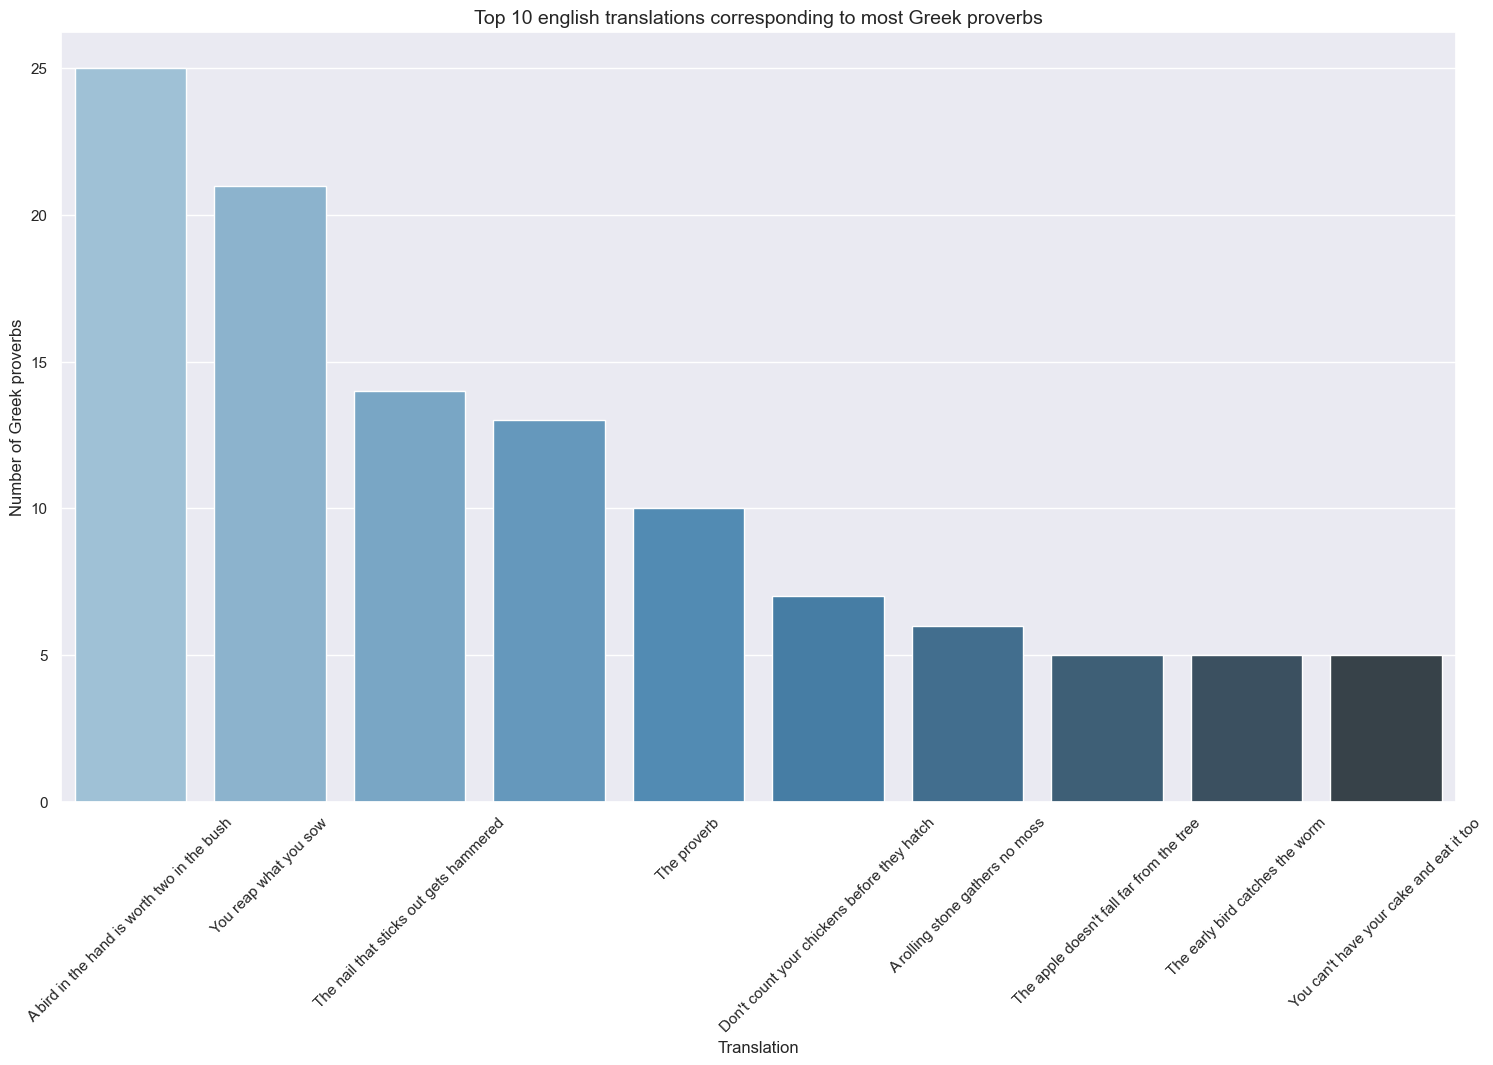

In [190]:
# importing some required modules
import matplotlib.pyplot as plt
import seaborn as sns

# Converting the 'english_proverb' and 'total_greek_proverbs' columns from the 'english_proverb_to_many_greek_proverbs' dataframe to lists
english_translations = english_proverb_to_many_greek_proverbs["english_proverb"].head(10).to_list()
number_of_greek_proverbs = english_proverb_to_many_greek_proverbs["total_greek_proverbs"].head(10).tolist()

# Setting a plot style
sns.set_theme()

# Creating a bar plot
plt.figure(figsize=(18, 10))
sns.barplot(x=english_translations, y=number_of_greek_proverbs, palette='Blues_d', hue=english_translations)

# Setting the title of the plot and the labels of the axes
plt.xticks(rotation=45) # change the rotation of the x-axis values
plt.title('Top 10 english translations corresponding to most Greek proverbs', fontsize=14)
plt.xlabel('Translation', fontsize=12)
plt.ylabel('Number of Greek proverbs', fontsize=12)

# Displaying the plot
plt.show()